In [ ]:
PCA(Pricipal Component Anolysys) 이상탐지 (차원축소, 시각화 기반 이상탐지)
비슷한종류의 데이터를 좀 줄이자 
컬럼개수가 줄어드는것(불필요한것들은 없애는 것)


차원 축소 종류
PCA : 주성분 분석
FA : 요인분석

키
ㅣ      /
ㅣ   ㅇ/
ㅣㅇ  /
ㅣ   /    ㅇ
ㅣㅡㅡㅡㅡㅡㅡㅡㅡ몸무게
여기에 projection (/) 은  1차원 , 몸무게 혼자는 1차원, 몸무게+키 -> 2차원 그런데 이 2차원에서 1차원인 projection을 그어서 만듬 이건 키도 아닌 몸무게도아님. 이걸 PC라고함 

정의 : 여러변수간에 존재하는 상관관계를 이용하여 주성분을 추출하여 차원을 축소하는 기법 -> PCA
기존데이터의 유실을 최소화 하기 위해 데이터의 분산을 최대화 할 수 있는 초 평면(Hyper plane)을 찾고 데이터를 투영함
다중공선성(변수층간 상관관계높아 ,각변수특성을 잘알수없는 것)을 제거하기위해 각 벡터의 축이 직각(상관관계 없도록) 이 되도록 투영시킴

직각인 것들은 0 이 됨. 
(0,1),(1,0) -> 
=(0)  (1)      (0)             (0)
 (1)  (0)   -> (1) *(1,0) ->   (0)  이렇게 곱해보면 0이되면 직각임. 즉, 상관관계가 없다고봄. 


장단점
     good: 고차원의 데이터를 저차원에 주성분으로 표현할수있음
     good: 선택한변수들의 해석이 용이함
      bad: 변수간 상관관계 고려가 어려움
      bad: 추출된 변수의 해석이 어려움(ex. 주성분, PC1/PC2)

사용방법
    데이터정규화 필수
    학습 데이터 셋에서 분산이 최대인 축 을 탐색
    이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 탐색
    첫번째 축과 두번째 축에 직교하고 분산이 최대한 보존하는 세 번째 축을 탐색
    앞과 같은 방법으로 데이터셋의 차원(특성 수 ) 만큼 축을 탐색

현업사례
    다양한 검사 공정에서 이상제품 탐지
    데이터 EDA를 통한 클러스터링


In [29]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('iris')
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler() #-1~1 사이 , 정규분포

pca = PCA()

pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(["species"], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [31]:
pca.n_components_

4

In [32]:
pca.explained_variance_ratio_ 

# 1번째가 0.72, 2번째가 0.22 3번째가 0.03 4번째가 0.005 
#이래서 1번째 2번째만 가지고 표현할수있다는걸확인가능 -> 0.72+0.22 로 2개 만있으면 0.94 % 만큼설명할수있기에.

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [33]:
#주성분 제일큰것 먼저 찾기 그리고 그것에 대한 직각 찾기. 

feature = range(pca.n_components_)
featured_data = pd.DataFrame(data=feature,columns=["pc_feature"])

variance_df = pd.DataFrame(data= pca.explained_variance_ratio_,columns=["variance"])
pc_featured_df = pd.concat([featured_data,variance_df])
pc_featured_df

,pc_feature,variance
0,0.0,NaN
1,1.0,NaN
2,2.0,NaN
3,3.0,NaN
0,NaN,0.729624
1,NaN,0.228508
2,NaN,0.036689
3,NaN,0.005179


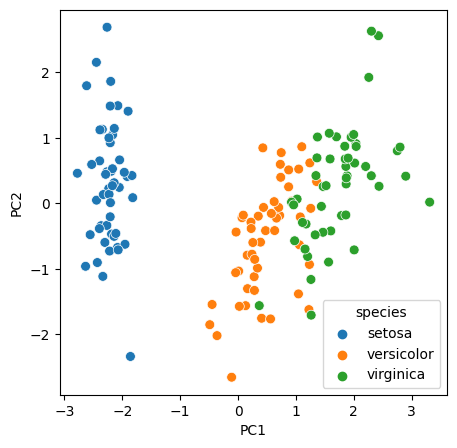

In [35]:
import matplotlib.pyplot as plt

x=df.drop(["species"],axis=1) 
y=df["species"]

#정규화
X_ = StandardScaler().fit_transform(x)

#2개의 주성분으로 차원축소.
pca = PCA(n_components = 2)
pc = pca.fit_transform(X_)

pc_df = pd.DataFrame(pc, columns=["PC1","PC2"]).reset_index(drop=True)
pc_df = pd.concat([pc_df,y] , axis=1)

plt.rcParams["figure.figsize"] = [5, 5]
sns.scatterplot(data=pc_df , x="PC1" , y="PC2" , hue = y , legend='brief', s=50 , linewidth=0.5)
plt.show()

In [ ]:
파란색 보면 마할라노비스 쓰면 찾을수있음. 이상치
또는 threshold로 -2 보다 작으면 ~ 정할수있음. 


In [ ]:
t-SNE 이상 탐지 (차원축소 , 시각화 기반 이상탐지) 

PCA는 선형분석방법으로 값을 투영하기 때문에 차원이 감소 되면서 군집화 되어있는 데이터들이 밀집되어 구별하기 어려운 단점 
t-sne는 위에 단점을 보완하기 위한 차원감소 방법 

꼬리가 길게 뻗어 있는 것 
낮은데이터일수록 더 멀리 떨어뜨리는 효과 발생




In [36]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [53]:
import seaborn as sns
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [54]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [55]:
df = df.drop(["sex","class","who","adult_male","deck","age","embarked","embark_town","alive","alone"],axis=1)  #살아있는지 죽어있는지를 이상탐지 보기.
df = df.dropna()
df

,survived,pclass,sibsp,parch,fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500
...,...,...,...,...,...
886,0,2,0,0,13.0000
887,1,1,0,0,30.0000
888,0,3,1,2,23.4500
889,1,1,0,0,30.0000


In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
 
scaler = StandardScaler() #-1~1 사이 , 정규분포

pca = PCA()

pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(["survived"], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [57]:
pca.components_

array([[-0.48718562,  0.37895747,  0.44295631,  0.65025465],
       [ 0.56020307,  0.58452906,  0.51885622, -0.27438391],
       [ 0.04011821, -0.69656505,  0.71457024, -0.05076449],
       [ 0.66874003, -0.1717968 , -0.15481379,  0.7066154 ]])

In [58]:
pca.explained_variance_ratio_  # 1,2번째 -> 75%  까지 가능 

array([0.41300824, 0.34322799, 0.14532236, 0.09844141])

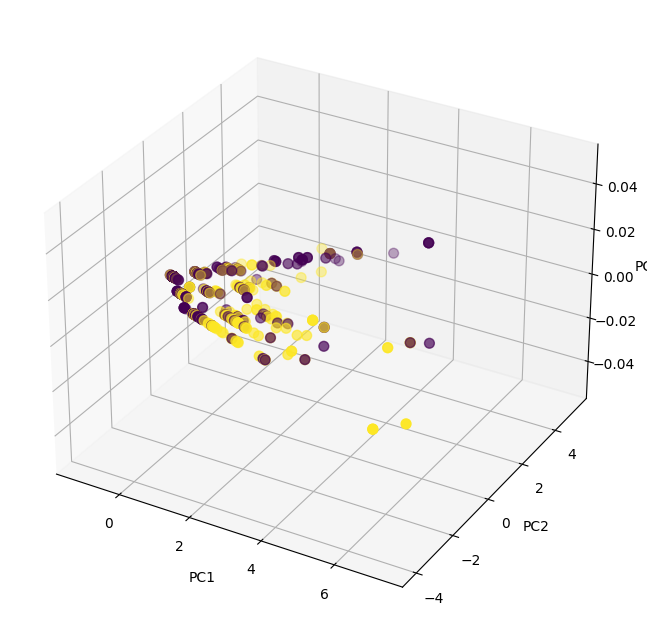

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

x=df.drop(["survived"],axis=1) 
y=df["survived"]

#정규화
X_ = StandardScaler().fit_transform(x)

#3개의 주성분으로 차원축소.
pca = PCA(n_components =2)
pc = pca.fit_transform(X_)

pc_df = pd.DataFrame(pc, columns=["PC1","PC2" ]).reset_index(drop=True)
pc_df = pd.concat([pc_df , y] , axis=1)

plt.rcParams["figure.figsize"] = [5, 5]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc_df["PC1"], pc_df["PC2"],   c=pc_df["survived"], cmap='viridis', s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [32]:
 
train_df = df[['pclass',"sibsp" ]]
 
tsne_np = TSNE(n_components = 2).fit_transform(train_df)
 
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,107.617393,6.667582
1,-100.393341,62.704117
2,-65.671051,-169.161041
3,5.658325,77.060486
4,-65.671051,-169.161041
...,...,...
886,-253.028519,82.362160
887,-22.452635,271.362366
888,175.224579,4.337756
889,-22.452635,271.362366


In [33]:
from sklearn.manifold import TSNE
tsne_np = TSNE(n_components = 2).fit_transform(train_df)
 
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1' ])
tsne_df

,component 0,component 1
0,173.532410,-98.312012
1,169.507721,200.054718
2,-55.047661,-159.149994
3,105.575577,227.730789
4,-55.047661,-159.149994
...,...,...
886,-261.222046,43.527534
887,-86.506607,271.602478
888,142.095795,42.292324
889,-86.506607,271.602478


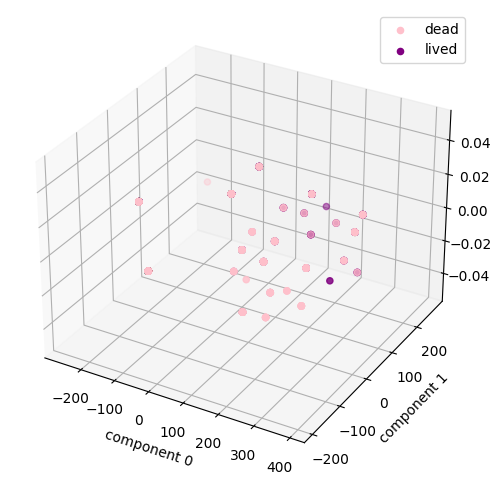

In [34]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
 
tsne_df['target'] = df['survived']
 
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1] 
 
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'],   color = 'pink', label = 'dead')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'],  color = 'purple', label = 'lived') 

ax.set_xlabel('component 0')
ax.set_ylabel('component 1') 
ax.legend()
plt.show()

In [157]:
from sklearn.datasets import load_wine
wine = load_wine()
df= pd.DataFrame(wine.data , columns = wine.feature_names)
df["class"]= wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [158]:
df.shape

(178, 14)

In [159]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
 
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(["class"], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [160]:
pca.n_components_

13

In [161]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [162]:
components = pca.components_
most_important_column_index = abs(components[2]).argmax()
most_important_column_index

2

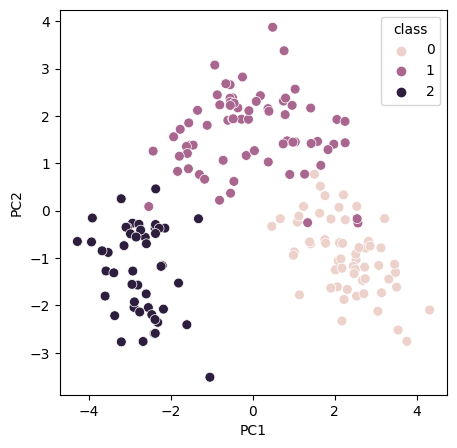

In [163]:
import matplotlib.pyplot as plt

feature = range(pca.n_components_)
featured_data = pd.DataFrame(data=feature ,columns=["pc_feature"])

variance_df = pd.DataFrame(data= pca.explained_variance_ratio_ ,columns=["variance"])
pc_featured_df = pd.concat([featured_data,variance_df])
pc_featured_df

x=df.drop(["class"],axis=1) 
y=df["class"]

#정규화
X_ = StandardScaler().fit_transform(x)
 
pca = PCA(n_components = 3)
pc = pca.fit_transform(X_)

pc_df = pd.DataFrame(pc, columns=["PC1","PC2","PC3"]).reset_index(drop=True)
pc_df = pd.concat([pc_df,y] , axis=1)

plt.rcParams["figure.figsize"] = [5, 5]
sns.scatterplot(data=pc_df , x="PC1" , y="PC2" , hue = y , legend='brief', s=50 , linewidth=0.5) 
plt.show()

In [165]:
pc_df[(pc_df["PC1"] < 0) & (pc_df["PC2"] < -3)]

# 이상치 찾기

,PC1,PC2,PC3,class
158,-1.048182,-3.51509,1.160039,2


In [166]:
df.iloc[158]

alcohol                          14.34
malic_acid                        1.68
ash                               2.70
alcalinity_of_ash                25.00
magnesium                        98.00
total_phenols                     2.80
flavanoids                        1.31
nonflavanoid_phenols              0.53
proanthocyanins                   2.70
color_intensity                  13.00
hue                               0.57
od280/od315_of_diluted_wines      1.96
proline                         660.00
class                             2.00
Name: 158, dtype: float64

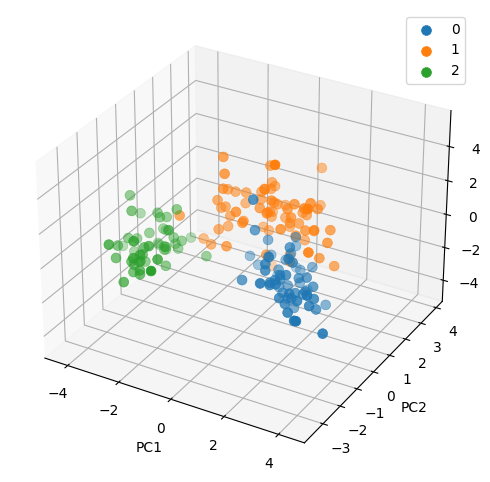

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df.drop(["class"], axis=1)
y = df["class"]

# 정규화
X_ = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
pc = pca.fit_transform(X_)

pc_df = pd.DataFrame(pc, columns=["PC1", "PC2", "PC3"]).reset_index(drop=True)
pc_df = pd.concat([pc_df, y], axis=1)

plt.rcParams["figure.figsize"] = [8, 6]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in y.unique():
    ax.scatter(pc_df.loc[pc_df['class'] == label, 'PC1'],
               pc_df.loc[pc_df['class'] == label, 'PC2'],
               pc_df.loc[pc_df['class'] == label, 'PC3'],
               label=label, s=50, linewidth=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()


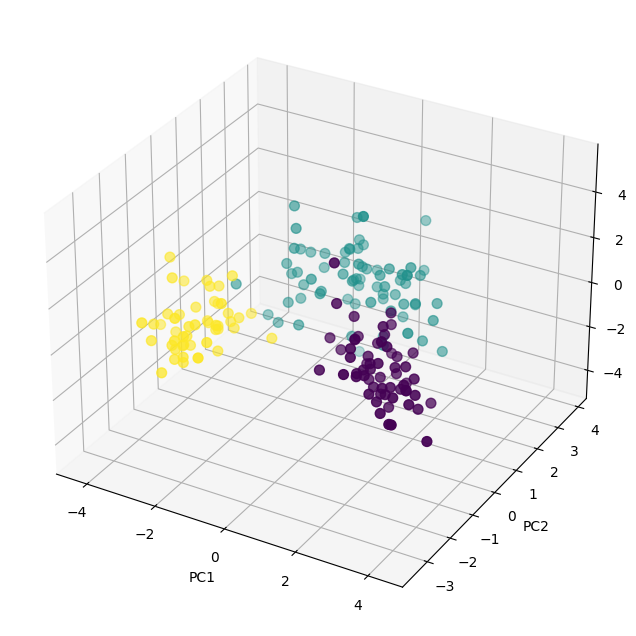

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

y = df["class"]

pca = PCA(n_components=4)
pc = pca.fit_transform(X_)

pc_df = pd.DataFrame(pc, columns=["PC1", "PC2", "PC3", "PC4"]).reset_index(drop=True)
pc_df = pd.concat([pc_df, y], axis=1)

plt.rcParams["figure.figsize"] = [8, 8]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc_df["PC1"], pc_df["PC2"], pc_df["PC3"] , c=pc_df["class"], cmap='viridis', s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [190]:
from sklearn.manifold import TSNE
traine_df = df

tsne_np = TSNE(n_components=2).fit_transform(train_df)
tsne_df = pd.DataFrame(tsne_np, columns=["CP1","CP2" ])
tsne_df

,CP1,CP2
0,11.268605,-0.898103
1,10.928603,-0.766113
2,13.487426,-0.587882
3,16.301592,-0.876497
4,2.689792,-0.384767
...,...,...
173,2.689941,0.038150
174,3.111680,-0.025832
175,5.694454,-0.321172
176,5.855436,-0.433018


In [186]:
%matplotlib qt5

In [192]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
 
tsne_df['target'] = df['class']
 
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1] 
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
 
ax.scatter(tsne_df_0['CP1'], tsne_df_0['CP2'],    color = 'pink', label = '0')
ax.scatter(tsne_df_1['CP1'], tsne_df_1['CP2'],     color = 'purple', label = '1') 
ax.scatter(tsne_df_2['CP1'], tsne_df_2['CP2'],    color = 'black', label = '2') 

ax.set_xlabel('CP1') 
ax.set_ylabel('CP2') 
#ax.set_xlabel('CP3') 

ax.legend()
plt.show()

In [167]:
tsne_df

,CP1,CP2,CP3,target
0,8.912978,-0.207776,-0.136889,0
1,8.615771,-0.036641,0.363491,0
2,10.666071,0.229150,0.199790,0
3,13.046276,0.327288,-0.164629,0
4,2.489523,-0.160886,0.026984,0
...,...,...,...,...
173,2.524737,-0.315016,-0.370568,2
174,2.820978,-0.270815,-0.281624,2
175,4.753688,-0.123257,-0.079358,2
176,4.855741,-0.114098,-0.063534,2
